# Your Goal: Your goal is to predict whether a client will subscribe to a bank term deposit.



In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [63]:
train_df.shape

(750000, 18)

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [65]:
train_df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [66]:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
print("Missing values:\n", missing_percentage)

Missing values:
 id           0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


In [67]:
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [68]:
train_df.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [69]:
numeric_cols = train_df.select_dtypes('int').columns
print(numeric_cols)

Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')


In [70]:
categorical_cols = train_df.select_dtypes('object').columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [71]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [72]:
numeric_df = train_df[numeric_cols]
numeric_df.head()

,id,age,balance,day,duration,campaign,pdays,previous,y
0,0,42,7,25,117,3,-1,0,0
1,1,38,514,18,185,1,-1,0,0
2,2,36,602,14,111,2,-1,0,0
3,3,27,34,28,10,2,-1,0,0
4,4,26,889,3,902,1,-1,0,1


In [73]:
train_df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [ ]:
# plt.figure(figsize=(16,12))

# for i,col in enumerate(numeric_cols):
#     plt.subplot(3,3,i + 1)
#     sns.histplot(train_df[col],kde=True,bins=30)
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("frequency")

# plt.tight_layout()
# plt.show()

In [75]:
# plt.figure(figsize=(16,12))

# for i,col in enumerate(numeric_cols):
#     plt.subplot(3,3,i+1)
#     sns.boxplot(train_df[col])
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("frequency")

# plt.tight_layout()
# plt.show()

In [76]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [77]:
# plt.figure(figsize=(16,12))

# for i,col in enumerate(categorical_cols):
#     plt.subplot(3,3,i+1)
#     sns.countplot(x=col,data=train_df)
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("count")

# plt.tight_layout()
# plt.show()

In [78]:
corr = numeric_df.corr()
corr

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.000223,-0.000282,-0.001692,0.000925,0.000646,-0.000551,0.000135,0.000615
age,-0.000223,1.000000,0.062838,-0.015179,-0.004388,0.002052,-0.021635,0.004541,0.009523
balance,-0.000282,0.062838,1.000000,-0.008269,0.109629,-0.027744,0.010040,0.033897,0.122513
day,-0.001692,-0.015179,-0.008269,1.000000,-0.056755,0.178806,-0.086197,-0.051082,-0.049625
duration,0.000925,-0.004388,0.109629,-0.056755,1.000000,-0.083016,0.047555,0.040105,0.519283
campaign,0.000646,0.002052,-0.027744,0.178806,-0.083016,1.000000,-0.061465,-0.026707,-0.075829
pdays,-0.000551,-0.021635,0.010040,-0.086197,0.047555,-0.061465,1.000000,0.561839,0.089277
previous,0.000135,0.004541,0.033897,-0.051082,0.040105,-0.026707,0.561839,1.000000,0.119552
y,0.000615,0.009523,0.122513,-0.049625,0.519283,-0.075829,0.089277,0.119552,1.000000


In [79]:
# plt.figure(figsize=(16,12))
# sns.heatmap(corr,annot=True)

In [80]:
# sns.pairplot(train_df)

In [81]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [82]:
y_with_age = train_df.groupby('y')['age'].sum()
y_with_age

y
0    26967954
1     3726842
Name: age, dtype: int64

<Axes: xlabel='y'>

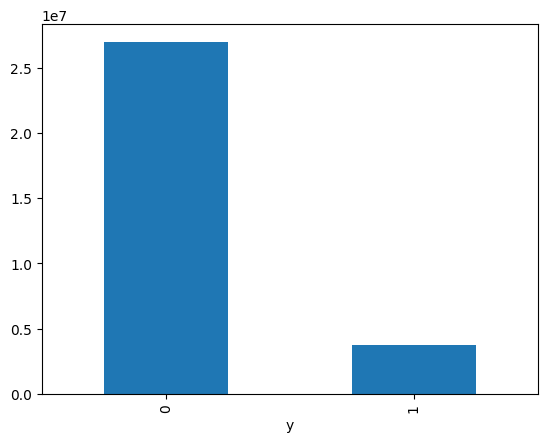

In [83]:
y_with_age.plot(kind='bar')

In [84]:
y_with_age = train_df.groupby(['y','marital'])['age'].sum()
y_with_age

y  marital 
0  divorced     2969885
   married     18569796
   single       5428273
1  divorced      404047
   married      2261031
   single       1061764
Name: age, dtype: int64

<Axes: xlabel='y,marital'>

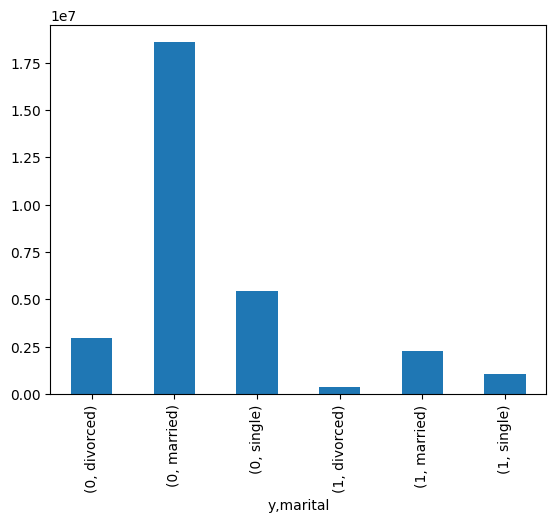

In [85]:
y_with_age.plot(kind='bar')

In [86]:
y_education = train_df.groupby(['y','education'])['age'].mean()
y_education

y  education
0  primary      45.756096
   secondary    40.096090
   tertiary     39.724667
   unknown      44.345433
1  primary      51.846172
   secondary    40.851654
   tertiary     38.898741
   unknown      44.938050
Name: age, dtype: float64

<Axes: xlabel='y,education'>

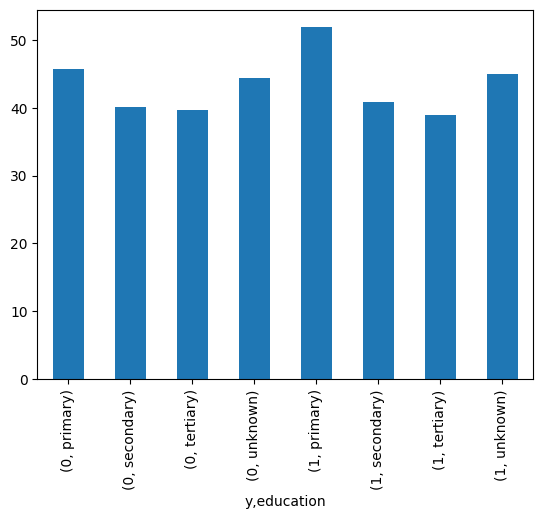

In [87]:
y_education.plot(kind='bar')

In [88]:
# which age people take loan 

loan_age = train_df.groupby('loan')['age'].mean()
loan_age

loan
no     40.993833
yes    40.512026
Name: age, dtype: float64

In [89]:
# plt.figure(figsize=(10,6))
# sns.kdeplot(data=train_df, x="age", hue="loan", fill=True)   # The data is split by the values in the loan column
# plt.title("Age Distribution by Loan Status")
# plt.xlabel("Age")
# plt.ylabel("Density")
# plt.show()

In [90]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [91]:
# # age group with educations

# plt.figure(figsize=(10,6))
# sns.kdeplot(data=train_df, x="age", hue="education", fill=True)   
# plt.title("Age Distribution by education Status")
# plt.xlabel("Age")
# plt.ylabel("Density")
# plt.show()

In [92]:
# check avg balance with education and job wise

balance_education = train_df.groupby('education')['balance'].mean()
balance_education

education
primary      1175.984152
secondary    1005.010451
tertiary     1543.667128
unknown      1461.858820
Name: balance, dtype: float64

In [93]:

balance_education = train_df.groupby('job')['balance'].mean()
balance_education

job
admin.           1019.924582
blue-collar       977.494182
entrepreneur     1306.749238
housemaid        1281.220211
management       1510.385283
retired          1812.071195
self-employed    1598.269138
services          834.625707
student          1577.318773
technician       1071.571535
unemployed       1440.574685
unknown          1678.960919
Name: balance, dtype: float64

In [94]:
train_df.groupby('month')['y'].value_counts()

month  y
apr    0     31582
       1      9737
aug    0    114406
       1     14453
dec    1      1062
       0      1007
feb    0     29833
       1      7778
jan    0     16586
       1      2351
jul    0    100595
       1     10052
jun    0     83954
       1      9716
mar    1      3315
       0      2487
may    0    212113
       1     16298
nov    0     58808
       1      7254
oct    0      4694
       1      4510
sep    1      3962
       0      3447
Name: count, dtype: int64

In [95]:
# plt.figure(figsize=(12,6))
# sns.countplot(data=train_df, x="month", hue="y", palette="Set2")
# plt.title("Distribution of y by Month")
# plt.xlabel("Month")
# plt.ylabel("Count")
# plt.legend(title="y")
# plt.show()


In [96]:
# plt.figure(figsize=(16,12))

# for i,col in enumerate(categorical_cols):
#     plt.subplot(3,3,i+1)
#     sns.countplot(data=train_df,x=col,hue='y')
#     plt.title(f"Distribution of y by {col}")
#     plt.xlabel(col)
#     plt.ylabel("frequency")

# plt.tight_layout()
# plt.show()

In [97]:
corr = numeric_df.corr()
y_corr = corr[['y']].sort_values(by='y',ascending=False)
y_corr


,y
y,1.000000
duration,0.519283
balance,0.122513
previous,0.119552
pdays,0.089277
age,0.009523
id,0.000615
day,-0.049625
campaign,-0.075829


<Axes: >

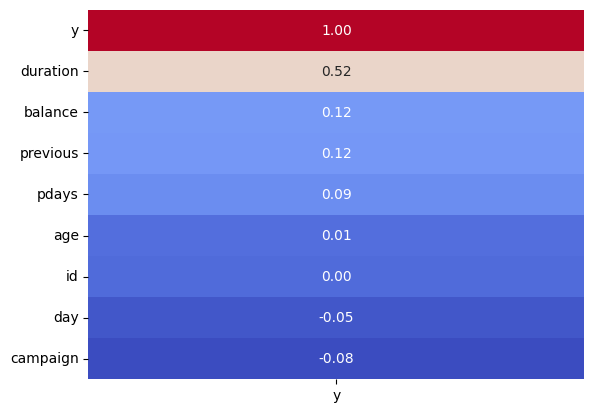

In [98]:
sns.heatmap(y_corr, annot=True, cmap="coolwarm", cbar=False, fmt=".2f")


In [99]:
labels = ['0-20', '21-40', '41-60', 'Above 61']
bins = [0, 20, 40, 60, 100 ]

In [100]:
train_df['Age_bins'] = pd.cut(train_df.age, bins, labels = labels, include_lowest=True)


In [101]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_bins
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,41-60
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,21-40
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,21-40
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,21-40
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,21-40


In [102]:
y_with_age = train_df.groupby('Age_bins')['y'].value_counts()
y_with_age

C:\Users\Admin\AppData\Local\Temp\ipykernel_20576\3572455566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_with_age = train_df.groupby('Age_bins')['y'].value_counts()


Age_bins  y
0-20      0       510
          1       220
21-40     0    355379
          1     51386
41-60     0    296590
          1     31443
Above 61  1      7439
          0      7033
Name: count, dtype: int64

<Axes: xlabel='Age_bins,y'>

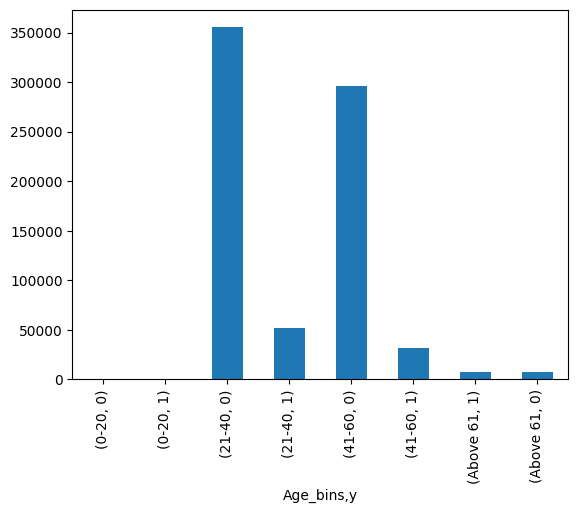

In [103]:
y_with_age.plot(kind='bar')

In [104]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_bins
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,41-60
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,21-40
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,21-40
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,21-40
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,21-40


In [106]:
train_df.shape

(750000, 19)

In [46]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(train_df[numeric_cols]))
outliers = (z_scores > 3)   # threshold usually 3
print(outliers.sum())


84636


In [47]:
Q1 = train_df[numeric_cols].quantile(0.25)
Q3 = train_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((train_df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
            (train_df[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())


id              0
age          4903
balance     57745
day             0
duration    46118
campaign    40686
pdays       77566
previous    77569
y           90488
dtype: int64


In [ ]:
# def cap_outlier(df,numeric_cols):
        
#         for col in numeric_cols:
#             q1 = df[col].quantile(0.25)
#             q3 = df[col].quantile(0.75)
#             IQR = q3 - q1

#             lower_bound = q1 - 1.5 * IQR
#             upper_bound = q3 + 1.5 * IQR

#             df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
#             df[col] = np.where(df[col] > upper_bound, lower_bound, df[col])

#         return df    

# train_df = cap_outlier(train_df, numeric_cols)


In [57]:
new_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

In [107]:
import numpy as np

def replace_outliers_with_mean(df, cols, threshold=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        mean_val = df[col].mean()
        
        # Replace outliers with mean
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                           mean_val,
                           df[col])
    return df

train_df = replace_outliers_with_mean(train_df, new_cols)


In [108]:
# import numpy as np

# def handle_outliers_with_log(df, cols):
#     for col in cols:
#         df[col] = np.log1p(df[col])  
#     return df

# train_df = handle_outliers_with_log(train_df, new_cols)


In [109]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_bins
0,0,42.0,technician,married,secondary,no,7.0,no,no,cellular,25.0,aug,117.000000,3.0,-1.0,0.0,unknown,0,41-60
1,1,38.0,blue-collar,married,secondary,no,514.0,no,no,unknown,18.0,jun,185.000000,1.0,-1.0,0.0,unknown,0,21-40
2,2,36.0,blue-collar,married,secondary,no,602.0,yes,no,unknown,14.0,may,111.000000,2.0,-1.0,0.0,unknown,0,21-40
3,3,27.0,student,single,secondary,no,34.0,yes,no,unknown,28.0,may,10.000000,2.0,-1.0,0.0,unknown,0,21-40
4,4,26.0,technician,married,secondary,no,889.0,yes,no,cellular,3.0,feb,256.229144,1.0,-1.0,0.0,unknown,1,21-40


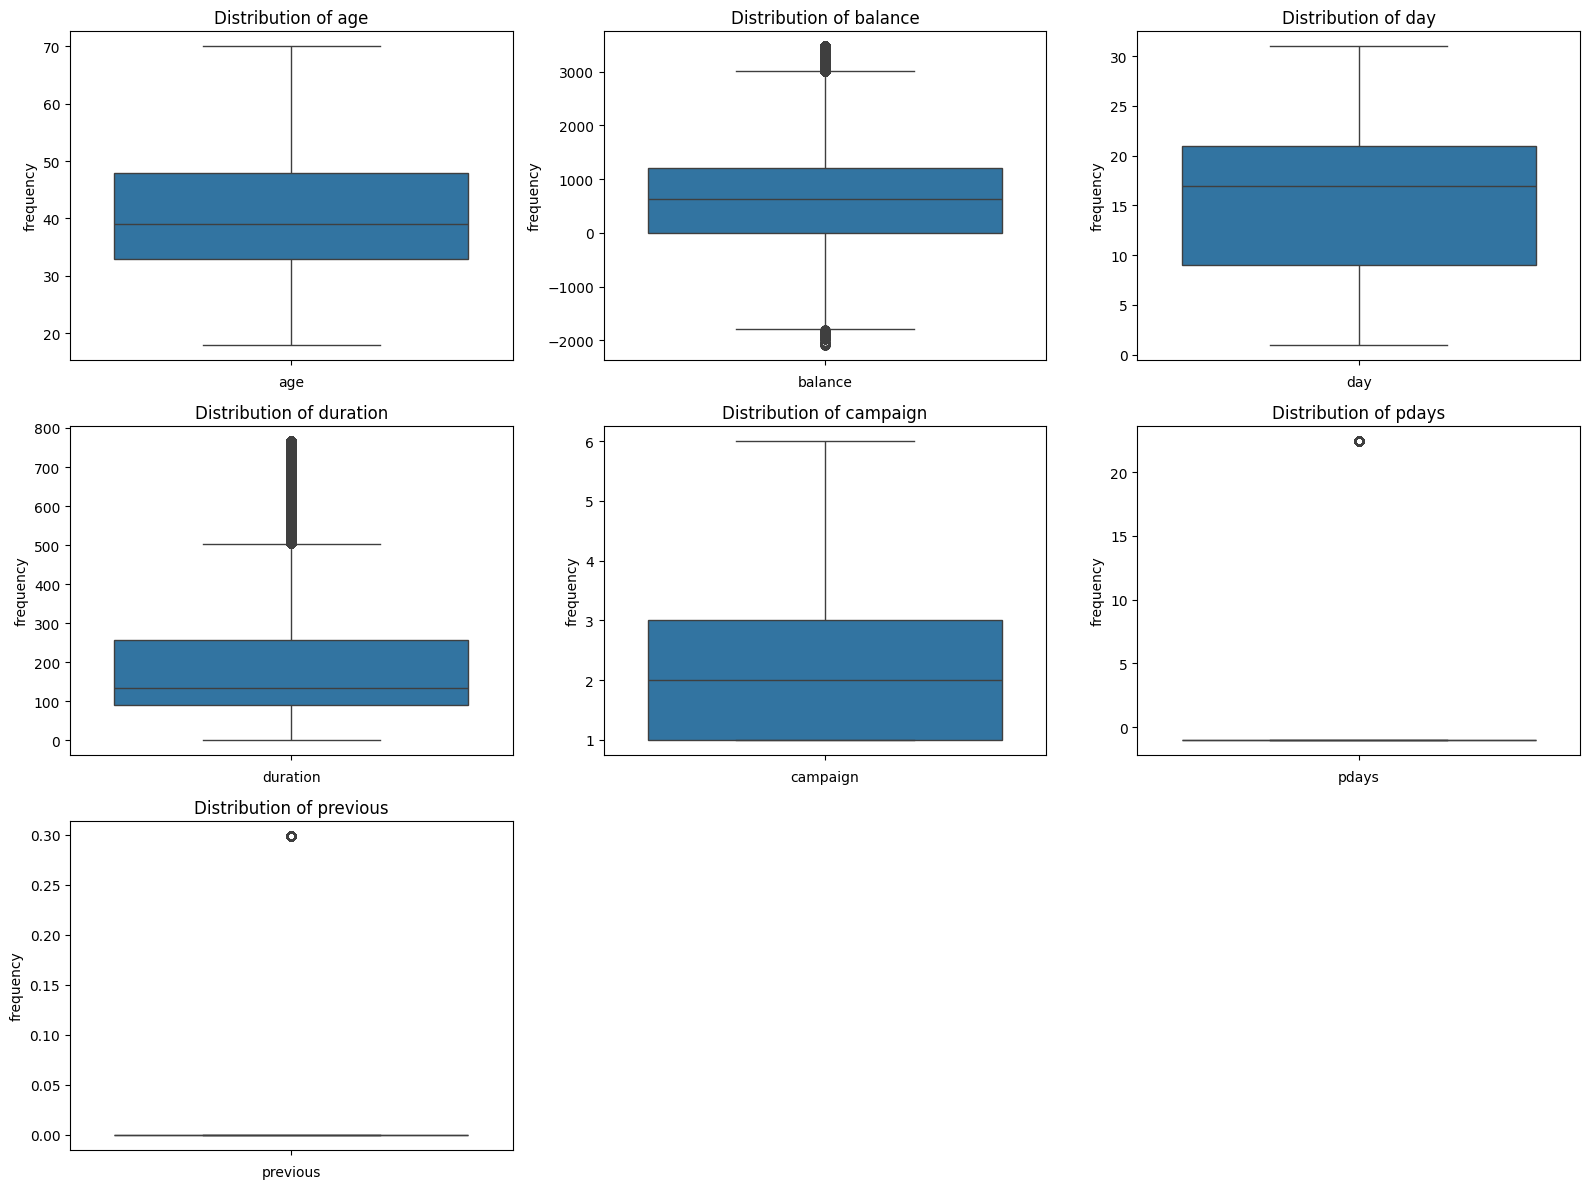

In [110]:
plt.figure(figsize=(16,12))

for i,col in enumerate(new_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(train_df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()

In [117]:
print(sum(train_df['education']=='unknown'))
print(sum(train_df['job']=='unknown'))
print(sum(train_df['contact']=='unknown'))
print(sum(train_df['poutcome']=='unknown'))

21299
2917
231627
672450


In [119]:
# Replace "unknown" with mode for each column
for col in ['education', 'job', 'contact', 'poutcome']:
    mode_val = train_df[col].mode()[0]   
    train_df[col] = train_df[col].replace('unknown', mode_val)

# Verify replacement
print(sum(train_df['education']=='unknown'))
print(sum(train_df['job']=='unknown'))
print(sum(train_df['contact']=='unknown'))
print(sum(train_df['poutcome']=='unknown'))


0
0
0
672450


# scaling

In [140]:
numeric_cols

Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [141]:
new_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

In [143]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scalar = StandardScaler()


train_df[new_cols] = scalar.fit_transform(train_df[new_cols])


In [144]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_bins
0,0,0.134205,technician,married,secondary,no,-0.837633,no,no,cellular,1.076594,aug,-0.507753,0.704483,-0.339634,-0.339641,unknown,0,41-60
1,1,-0.278521,blue-collar,married,secondary,no,-0.259323,no,no,unknown,0.228194,jun,-0.135515,-0.885404,-0.339634,-0.339641,unknown,0,21-40
2,2,-0.484884,blue-collar,married,secondary,no,-0.158946,yes,no,unknown,-0.256606,may,-0.540597,-0.090461,-0.339634,-0.339641,unknown,0,21-40
3,3,-1.413517,student,single,secondary,no,-0.806836,yes,no,unknown,1.440194,may,-1.093480,-0.090461,-0.339634,-0.339641,unknown,0,21-40
4,4,-1.516698,technician,married,secondary,no,0.168421,yes,no,cellular,-1.589805,feb,0.254400,-0.885404,-0.339634,-0.339641,unknown,1,21-40


In [145]:
train_df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [112]:
for col in categorical_cols:
    print(train_df[col].value_counts())

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
default
no     737151
yes     12849
Name: count, dtype: int64
housing
yes    411288
no     338712
Name: count, dtype: int64
loan
no     645023
yes    104977
Name: count, dtype: int64
contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64
month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
mar      5802
dec      2069
Name: count, dtype: int6

In [147]:
train_df[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [148]:
encode = LabelEncoder()
for col in categorical_cols:
    train_df[col] = encode.fit_transform(train_df[col])

In [149]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_bins
0,0,0.134205,9,1,1,0,-0.837633,0,0,0,1.076594,1,-0.507753,0.704483,-0.339634,-0.339641,3,0,41-60
1,1,-0.278521,1,1,1,0,-0.259323,0,0,2,0.228194,6,-0.135515,-0.885404,-0.339634,-0.339641,3,0,21-40
2,2,-0.484884,1,1,1,0,-0.158946,1,0,2,-0.256606,8,-0.540597,-0.090461,-0.339634,-0.339641,3,0,21-40
3,3,-1.413517,8,2,1,0,-0.806836,1,0,2,1.440194,8,-1.093480,-0.090461,-0.339634,-0.339641,3,0,21-40
4,4,-1.516698,9,1,1,0,0.168421,1,0,0,-1.589805,3,0.254400,-0.885404,-0.339634,-0.339641,3,1,21-40


In [151]:
df = train_df.drop(['housing','contact','Age_bins'],axis=1)

In [153]:
corr = df.corr()
corr[['y']].sort_values(by='y',ascending=False)

,y
y,1.000000
duration,0.360786
balance,0.172141
previous,0.169502
pdays,0.169470
education,0.080259
marital,0.073598
job,0.054058
id,0.000615
age,-0.019264


<Axes: >

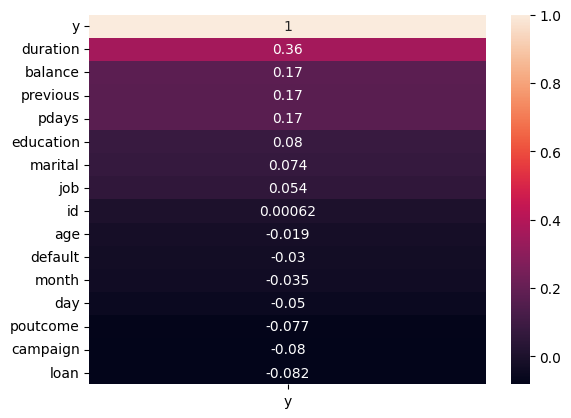

In [154]:
sns.heatmap(corr[['y']].sort_values(by='y',ascending=False),annot=True)

In [155]:
df.head()

,id,age,job,marital,education,default,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0.134205,9,1,1,0,-0.837633,0,1.076594,1,-0.507753,0.704483,-0.339634,-0.339641,3,0
1,1,-0.278521,1,1,1,0,-0.259323,0,0.228194,6,-0.135515,-0.885404,-0.339634,-0.339641,3,0
2,2,-0.484884,1,1,1,0,-0.158946,0,-0.256606,8,-0.540597,-0.090461,-0.339634,-0.339641,3,0
3,3,-1.413517,8,2,1,0,-0.806836,0,1.440194,8,-1.093480,-0.090461,-0.339634,-0.339641,3,0
4,4,-1.516698,9,1,1,0,0.168421,0,-1.589805,3,0.254400,-0.885404,-0.339634,-0.339641,3,1


In [54]:

from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
Y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [56]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
model.score(X_train,y_train)    

1.0

In [59]:
model.score(X_test,y_test)


0.9235533333333333

In [60]:
y_pred = model.predict(X_test)


In [61]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9236
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    131795
           1       0.73      0.58      0.65     18205

    accuracy                           0.92    150000
   macro avg       0.84      0.78      0.80    150000
weighted avg       0.92      0.92      0.92    150000



In [62]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("Validation ROC AUC:", auc)


Validation ROC AUC: 0.7768796791943378


# hyperparameter tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,         
    cv=3,              
    verbose=2,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 2.2min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300

In [64]:
random_search.score(X_train,y_train)    

0.99889

In [65]:
random_search.score(X_test,y_test)


0.9240066666666666

In [66]:
print("Best Params:", random_search.best_params_)


Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [67]:
from sklearn.metrics import roc_auc_score

y_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]  
auc = roc_auc_score(y_test, y_pred_proba)
print("Validation ROC AUC:", auc)


Validation ROC AUC: 0.9551346295205849


In [162]:
import pickle

# Save the trained model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(random_search.best_estimator_, f)


In [163]:
import pickle

# Load the saved model
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


In [164]:
# Example: make predictions
y_pred = loaded_model.predict(X_test)

# If ROC AUC is required, get probabilities
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]


In [88]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [89]:
new_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [90]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [91]:
test_df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [92]:
test_df[new_cols] = scalar.transform(test_df[new_cols])


In [93]:
for col in categorical_cols:
    test_df[col] = encode.fit_transform(test_df[col])

In [94]:
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,-0.883905,1,1,1,0,0.068028,1,0,2,0.591794,8,-0.118248,-0.580100,-0.302803,-0.223475,3
1,750001,0.304353,4,1,2,0,-0.416441,1,0,0,-1.589805,0,1.209922,-0.212251,-0.302803,-0.223475,3
2,750002,-0.487819,6,1,0,0,-0.408332,1,1,0,-0.377806,8,-0.532843,-0.212251,-0.302803,-0.223475,3
3,750003,1.690653,1,1,1,0,-0.911136,1,1,2,1.561394,8,-0.481477,-0.580100,-0.302803,-0.223475,3
4,750004,-1.279990,9,2,1,0,0.263014,1,0,0,0.712994,5,-0.276014,-0.580100,-0.302803,-0.223475,3


In [95]:
test_df = test_df.drop(['housing','contact'],axis=1)

In [156]:
test_df.head()

,id,age,job,marital,education,default,balance,loan,day,month,duration,campaign,pdays,previous,poutcome
0,750000,-0.883905,1,1,1,0,0.068028,0,0.591794,8,-0.118248,-0.580100,-0.302803,-0.223475,3
1,750001,0.304353,4,1,2,0,-0.416441,0,-1.589805,0,1.209922,-0.212251,-0.302803,-0.223475,3
2,750002,-0.487819,6,1,0,0,-0.408332,1,-0.377806,8,-0.532843,-0.212251,-0.302803,-0.223475,3
3,750003,1.690653,1,1,1,0,-0.911136,1,1.561394,8,-0.481477,-0.580100,-0.302803,-0.223475,3
4,750004,-1.279990,9,2,1,0,0.263014,0,0.712994,5,-0.276014,-0.580100,-0.302803,-0.223475,3


In [ ]:
output = random_search.predict(test_df)
output

array([0, 0, 0, ..., 0, 0, 0], shape=(250000,))

In [159]:
result = pd.DataFrame({
    "id": test_df["id"],
    "y": output
})

result.head()

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0


In [161]:
result.to_csv("submission.csv", index=False)
